In [1]:
import pandas as pd

train = pd.read_csv('training.csv',header='infer')
num_rows_training = train.count(axis = 1);
print(f'Number of rows in training set = {len(num_rows_training)}')

test = pd.read_csv('testing.csv',header='infer')
num_rows_testing = test.count(axis = 1);
print(f'Number of rows in testing set = {len(num_rows_testing)}')

train.head()

,class,b1,b2,b3,b4,b5,b6,b7,b8,b9,...,pred_minus_obs_H_b9,pred_minus_obs_S_b1,pred_minus_obs_S_b2,pred_minus_obs_S_b3,pred_minus_obs_S_b4,pred_minus_obs_S_b5,pred_minus_obs_S_b6,pred_minus_obs_S_b7,pred_minus_obs_S_b8,pred_minus_obs_S_b9
0,d,39,36,57,91,59,101,93,27,60,...,-2.36,-18.41,-1.88,-6.43,-21.03,-1.60,-6.18,-22.50,-5.20,-7.86
1,h,84,30,57,112,51,98,92,26,62,...,-2.26,-16.27,-1.95,-6.25,-18.79,-1.99,-6.18,-23.41,-8.87,-10.83
2,s,53,25,49,99,51,93,84,26,58,...,-1.46,-15.92,-1.79,-4.64,-17.73,-0.48,-4.69,-19.97,-4.10,-7.07
3,s,59,26,49,103,47,92,82,25,56,...,2.68,-13.77,-2.53,-6.34,-22.03,-2.34,-6.60,-27.10,-7.99,-10.81
4,d,57,49,66,103,64,106,114,28,59,...,-2.94,-21.74,-1.64,-4.62,-23.74,-0.85,-5.50,-22.83,-2.74,-5.84


In [2]:
s_count_test = test['class'].str.contains('s').sum()
h_count_test = test['class'].str.contains('h').sum()
d_count_test = test['class'].str.contains('d').sum()
o_count_test = test['class'].str.contains('o').sum()

s_count_train = train['class'].str.contains('s').sum()
h_count_train = train['class'].str.contains('h').sum()
d_count_train = train['class'].str.contains('d').sum()
o_count_train = train['class'].str.contains('o').sum()

training_dist = pd.Series([s_count_train/len(num_rows_training),
                           d_count_train/len(num_rows_training),
                           h_count_train/len(num_rows_training),
                           o_count_train/len(num_rows_training)] ,
                           index = ['s', 'd', 'h', 'o'], name = "Class distribution for training data:").to_frame()

testing_dist = pd.Series([s_count_test/len(num_rows_testing),
                          d_count_test/len(num_rows_testing),
                          o_count_test/len(num_rows_testing),
                          h_count_test/len(num_rows_testing)],
                          index = ['s', 'd', 'o', 'h'], name = "Class distribution for test data:").to_frame()


print(training_dist)
print()
print(testing_dist)

   Class distribution for training data:
s                               0.297980
d                               0.272727
h                               0.242424
o                               0.186869

   Class distribution for test data:
s                           0.418462
d                           0.323077
o                           0.141538
h                           0.116923


In [3]:
from sklearn.model_selection import train_test_split

Y_train = pd.Series(train['class'].values)
Y_test = pd.Series(test['class'].values)
X_train = train.drop(labels = 'class' , axis = 1)
X_test = test.drop(labels = 'class' , axis = 1 )

In [6]:
from sklearn import tree
from sklearn.metrics import accuracy_score

clf = tree.DecisionTreeClassifier();

clf = clf.fit(X_train, Y_train)

Y_pred = clf.predict(X_test)

score = accuracy_score(Y_test, Y_pred)

print("Test Accuracy" , score)

Test Accuracy 0.796923076923077


Best hyper param :  2
test accuracy : 0.8


(0.7, 1.0)

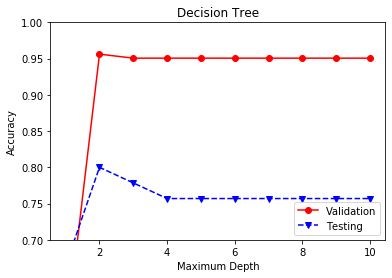

In [7]:
import numpy as np
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
%matplotlib inline

maxdepths = [1,2,3,4,5,6,7,8,9,10]

validationAcc = np.zeros(len(maxdepths))
testAcc = np.zeros(len(maxdepths))
numFolds = 10
index = 0

for depth in maxdepths:
    clf = tree.DecisionTreeClassifier(max_depth = depth, random_state = 1)
    scores = cross_val_score(clf, X_train, Y_train, cv= numFolds)
    validationAcc[index] = np.mean(scores)
 
    clf = clf.fit(X_train, Y_train)
    Y_predTest = clf.predict(X_test)
    
    testAcc[index] = accuracy_score(Y_test, Y_predTest)
    
    bestHyperparam = np.argmax(validationAcc)
    index += 1
    
print("Best hyper param : " , maxdepths[bestHyperparam])
print("test accuracy :" , testAcc[bestHyperparam])
    

plt.plot(maxdepths, validationAcc, 'ro-', maxdepths, testAcc, 'bv--')
plt.xlabel('Maximum Depth')
plt.ylabel('Accuracy')
plt.title('Decision Tree')
plt.legend(['Validation', 'Testing'])
plt.ylim([0.7, 1.0])


Best hyperparameter: k = 1
Test Accuracy = 0.8646153846153846


(0.7, 1.0)

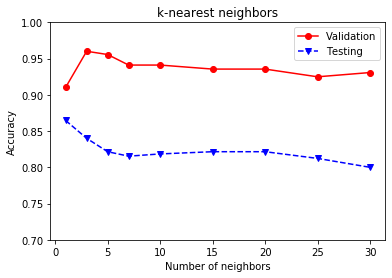

In [16]:
from sklearn.neighbors import KNeighborsClassifier

numNeighbors = [1,3,5,7,10,15,20,25,30]
validationAcc = np.zeros(len(numNeighbors))
knn_acc = []
numFolds = 10
index = 0
for nn in numNeighbors:
    scores = cross_val_score(clf, X_train, Y_train, cv= numFolds)
    validationAcc[index] = np.mean(scores)
    
    clf = KNeighborsClassifier(n_neighbors=nn)
    clf.fit(X_train, Y_train)
    Y_pred = clf.predict(X_test)
    knn_acc.append(accuracy_score(Y_test, Y_pred))
    index += 1 
    
bestHyperparam = np.argmax(knn_acc)
print('Best hyperparameter: k =', numNeighbors[bestHyperparam])
print('Test Accuracy =', knn_acc[bestHyperparam])
    
plt.plot(numNeighbors, validationAcc, 'ro-', numNeighbors,knn_acc , 'bv--')
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.title('k-nearest neighbors')
plt.legend(['Validation','Testing'])
plt.ylim([0.7,1.0])

Best hyperparameter, C = 0.2
Test Accuracy = 0.8492307692307692


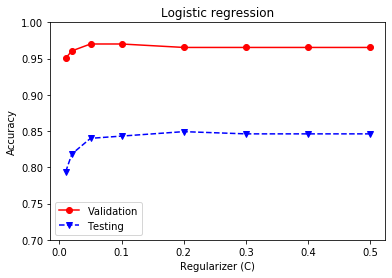

In [20]:
from sklearn import linear_model
import warnings
with warnings.catch_warnings():
    warnings.filterwarnings("ignore")
    
    regularizers = [0.01, 0.02, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5]
    logistic_acc = np.zeros(len(regularizers))
    validationAcc = np.zeros(len(regularizers))
    index = 0
    numFolds = 10

    for reg in regularizers:
        clf = linear_model.LogisticRegression(C = reg, penalty = 'l1', solver = 'liblinear', random_state=1)
        clf.fit(X_train, Y_train)
        Y_pred = clf.predict(X_test)
        logistic_acc[index] = (accuracy_score(Y_test, Y_pred))
        scores = cross_val_score(clf, X_train, Y_train, cv= numFolds)
        validationAcc[index] = np.mean(scores)
        index += 1

    bestHyperparam = np.argmax(logistic_acc)  
    plt.plot(regularizers, validationAcc, 'ro-', regularizers, logistic_acc, 'bv--')
    plt.xlabel('Regularizer (C)')
    plt.ylabel('Accuracy')
    plt.title('Logistic regression')
    plt.legend(['Validation','Testing'])
    plt.ylim([0.7,1.0])


    print('Best hyperparameter, C =', regularizers[bestHyperparam])
    print('Test Accuracy =', logistic_acc[bestHyperparam])


